# Using E-Flux with expression data...

In [1]:
from pyabolism.io import load_model

model = load_model('data/ecoli_core.xml')

# set default bounds for all the reactions
[r.set_default_bounds() for r in model.reactions()];

We make a list of some genes found in the ecoli_core model

In [2]:
gene_ids = ['b2926', 'b2925', 'b0008', 'b3734', 'b3735', 'b3736', 'b3737', 'b3731', 'b3732', 'b0767', 'b3738', 'b3739', 'b1702', 'b2914', 'b3919', 'b3916', 'b2587', 'b3117', 'b0722', 'b0723', 'b0720', 'b0721', 'b0726', 'b0727', 'b0724', 'b0728', 'b1380', 'b1136', 'b1241', 'b0474', 'b1417', 'b1416', 'b2276', 'b2277', 'b2278', 'b2279', 'b2465', 'b2463', 'b2779', 'b1276', 'b4025', 'b2975', 'b2976', 'b0729', 'b3603', 'b2416', 'b2417', 'b2415', 'b1479', 'b2287', 'b1779']

We create two sets of synthetic expression data, building a dictionary with a random (0,100) number associated deterministically with each of the genes...

In [3]:
from random import random,seed

expressions_A = {}
for gid in gene_ids:
    seed(gid)
    expressions_A[gid] = 100*random()

expressions_B = {}
for gid in gene_ids:
    seed(gid+gid+gid)
    expressions_B[gid] = 100*random()

## Comparing growth rates...

We first determine the growth rate from basic FBA

In [4]:
from pyabolism.simulate import FBA,EFlux

FBA(model,show=True)

R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.8614074126


Using our first set of synthetic expressions data...

In [5]:
# we reset the bounds for all reactions
[r.reset_bounds() for r in model.reactions()];

EFlux(model,expressions_A,show=True)

R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.4431471618


We can then compare this result with our alternative expression data...

In [6]:
# we reset the bounds for all reactions
[r.reset_bounds() for r in model.reactions()];

EFlux(model,expressions_B,show=True)

R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.3000723553


## Examining flux distributions...

If the predicted flux *distribution* is of interest, it is import to use a norm, for example the L2 or 'euclidean' norm. 

In [7]:
# we reset the bounds for all reactions
[r.reset_bounds() for r in model.reactions()];

EFlux(model,expressions_B,norm='L2',show=True)

R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.3000723553


The achieved objective function remains the same, but we minimise the total fluxes and hence can make meaningful interpretation of the flux vector

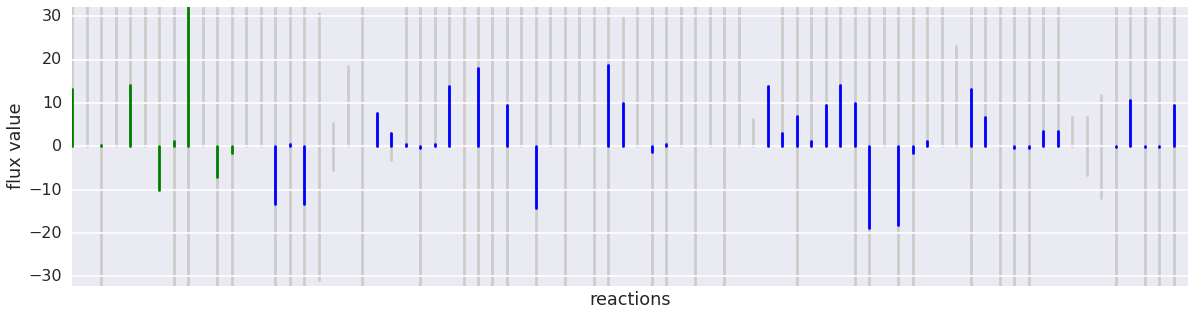

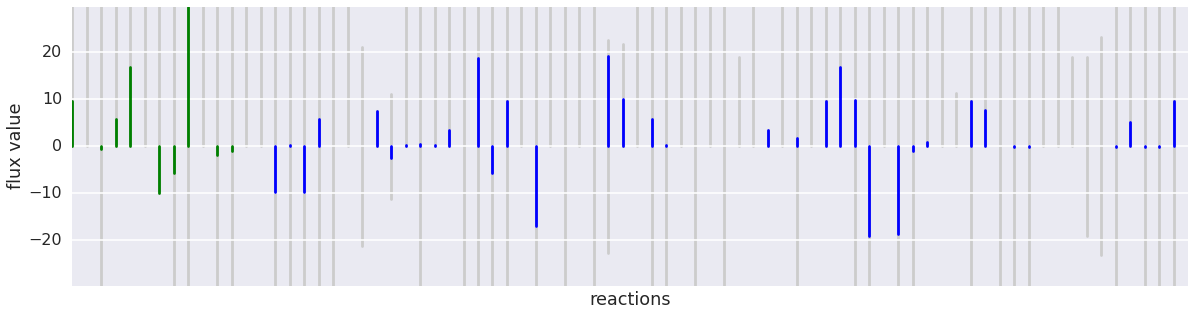

In [9]:
%matplotlib inline

from pyabolism.visualise import plot_flux_distribution

# we reset the bounds for all reactions
[r.reset_bounds() for r in model.reactions()];
EFlux(model,expressions_A,show=False)
plot_flux_distribution(model)


# we reset the bounds for all reactions
[r.reset_bounds() for r in model.reactions()];
EFlux(model,expressions_B,show=False)
plot_flux_distribution(model)
